In [3]:
#imports 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE

In [4]:
#Load the data
path = "./outputs/playground_metropolis_phi_phi/2024-09-06/18-30-35_438/all.json"
with open(path, "r") as file:
    data_mh = json.load(file)
path = "./outputs/playground_is_phi_phi/2024-09-06/18-09-17_439/all.json"
with open(path, "r") as file:
    data_is = json.load(file)


In [5]:
#For fair comparison it is better to compare with the same true rule
assert data_mh["true_rule"] == data_is["true_rule"]
print(len(data_mh["rules"]), len(data_is["rules"]))

603 200


In [6]:
#Extract data
true_rule = data_mh["true_rule"]

all_rules_mh, all_rules_is = np.array(data_mh["rules"]), np.array(data_is["rules"])
all_likelihoods_mh, all_likelihoods_is = np.array(data_mh["likelihoods"]),np.array(data_is["likelihoods"])
metrics_mh, metrics_is = data_mh["metrics"], data_is["metrics"]

all_weights_mh = metrics_mh["weights"]
all_prev_rules_ind_mh = np.array(metrics_mh["prev_rules_ind"])
nb_particles_mh = metrics_mh["nb_particles"]


counts_is = np.array(metrics_is["counts"])

# Print rules

In [7]:
print("Metropolis Hastings")
indices = np.argsort(-np.array(all_likelihoods_mh))
print("------------------------")
print("true rule: " + repr(true_rule))
print("------------------------")
for ind in indices:
    print(
        f"-----rule-----:{ind%nb_particles_mh}-{ind//nb_particles_mh}({all_prev_rules_ind_mh[ind]}):   {repr(all_rules_mh[ind])}, likelihood: {all_likelihoods_mh[ind]:2f}, weight: {all_weights_mh[ind]:2f}"
    )

Metropolis Hastings
------------------------
true rule: 'Default rule'
------------------------
-----rule-----:2-183(105):   "Plant seeds with water: Plant seeds with water causes them to grow into their corresponding fruits or plants (e.g., 'The pea seed grows into the pea').\nHold specific animals when standing on corresponding baby animals, and release water: Holding specific animals when standing on the corresponding baby animals causes them to mature into their adult forms (e.g., 'The baby pig releases the water and the baby pig grows into the pig').", likelihood: -142.563934, weight: 1.847336
-----rule-----:2-105(99):   "Plant seeds with water: Plant seeds with water causes them to grow into their corresponding fruits or plants (e.g., 'The pea seed grows into the pea').\n\nHold specific animals when standing on corresponding baby animals, and release water: Holding specific animals when standing on the corresponding baby animals causes them to mature into their adult forms (e.g.,

In [9]:
print("Importance Sampling")
indices = np.argsort(-np.array(all_likelihoods_is))
print("------------------------")
print("true rule: " + repr(true_rule))
print("------------------------")
for ind in indices:
    print(
        f"-----rule-----:{ind}:   {repr(all_rules_is[ind])}, likelihood: {all_likelihoods_is[ind]:2f}, count: {counts_is[ind]}"
    )

Importance Sampling
------------------------
true rule: 'Default rule'
------------------------
-----rule-----:74:   'The rule to predict how the environment will change based on the trajectories provided is:\n\n"For each object placed on water, it grows into a plant seed (e.g., pea, berry, carrot, potato, water). For each plant seed, releasing water makes it grow into the seed, which is then held. Standing on the grown plant allows the herbivore to grow into a larger herbivore (e.g., p', likelihood: -235.034164, count: 1
-----rule-----:175:   'The rule for predicting the environmental change based on these trajectories is that the object (water, seed, animal) grows into whatever it transforms into (berry, pea, animal) when released.', likelihood: -241.113037, count: 1
-----rule-----:109:   'The rule to predict the changes in the environment based on these trajectories is:\n\nEvery object (water, seed, animal, etc.) when released and exposed to water, will grow into its corresponding l

# Comparison

In [10]:
# restaure the counts for is for futur use
all_rules_is = np.repeat(all_rules_is, counts_is, axis=0)
all_likelihoods_is = np.repeat(all_likelihoods_is, counts_is, axis=0)

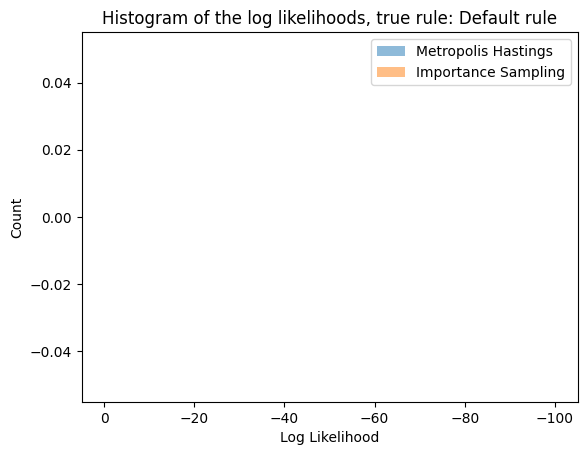

In [11]:
# Histogram of the likelihoods
plt.figure()
plt.hist(all_likelihoods_mh, range=(-100,0), bins=100, alpha=0.5, label="Metropolis Hastings")
plt.hist(all_likelihoods_is, range=(-100,0), bins=100, alpha=0.5, label="Importance Sampling")
plt.xlabel("Log Likelihood")
plt.ylabel("Count")
# Set the x-axis in descending order
plt.gca().invert_xaxis()
plt.legend()
plt.title(f"Histogram of the log likelihoods, true rule: {true_rule}")
plt.show()


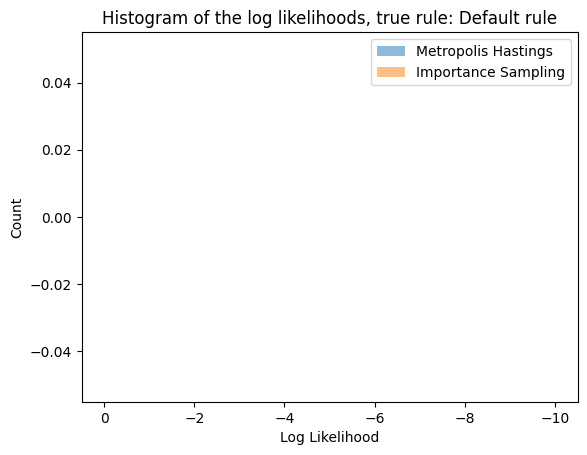

In [12]:
# Histogram of the likelihoods
plt.figure()
plt.hist(all_likelihoods_mh, range=(-10,0), bins=100, alpha=0.5, label="Metropolis Hastings")
plt.hist(all_likelihoods_is, range=(-10,0), bins=100, alpha=0.5, label="Importance Sampling")
plt.xlabel("Log Likelihood")
plt.ylabel("Count")
# Set the x-axis in descending order
plt.gca().invert_xaxis()
plt.legend()
plt.title(f"Histogram of the log likelihoods, true rule: {true_rule}")
plt.show()



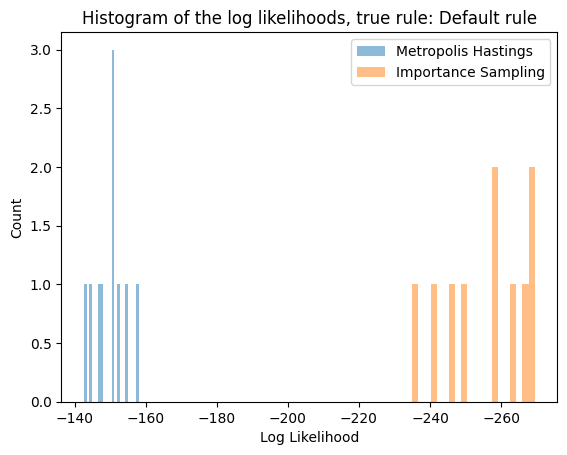

In [13]:
# Histogram of the likelihoods
plt.figure()
plt.hist(all_likelihoods_mh[np.argsort(-all_likelihoods_mh)[:10]], bins=20, alpha=0.5, label="Metropolis Hastings")
plt.hist(all_likelihoods_is[np.argsort(-all_likelihoods_is)[:10]], bins=20, alpha=0.5, label="Importance Sampling")
plt.xlabel("Log Likelihood")
plt.ylabel("Count")
# Set the x-axis in descending order
plt.gca().invert_xaxis()
plt.legend()
plt.title(f"Histogram of the log likelihoods, true rule: {true_rule}")
plt.show()


In [14]:
# Best rules of each method
best_taken = 10
best_rules_ind_mh = np.argsort(-all_likelihoods_mh)[:best_taken]
best_rules_ind_is = np.argsort(-all_likelihoods_is)[:best_taken]
all_likelihoods = np.concatenate([all_likelihoods_mh[best_rules_ind_mh], all_likelihoods_is[best_rules_ind_is]])
all_rules = np.concatenate([all_rules_mh[best_rules_ind_mh], all_rules_is[best_rules_ind_is]])
indices = np.argsort(-all_likelihoods)
for ind in indices:
    if ind < best_taken:
        color_start = "\x1b[31m"
        color_end = "\x1b[0m"
    else:
        color_start = "\033[92m"
        color_end = "\033[0m"
    print(
        f"{color_start}-----rule-----:{ind}:   {repr(all_rules[ind])}, likelihood: {all_likelihoods[ind]:2f}{color_end}"
    )

-----rule-----:0:   "Plant seeds with water: Plant seeds with water causes them to grow into their corresponding fruits or plants (e.g., 'The pea seed grows into the pea').\nHold specific animals when standing on corresponding baby animals, and release water: Holding specific animals when standing on the corresponding baby animals causes them to mature into their adult forms (e.g., 'The baby pig releases the water and the baby pig grows into the pig').", likelihood: -142.563934
-----rule-----:1:   "Plant seeds with water: Plant seeds with water causes them to grow into their corresponding fruits or plants (e.g., 'The pea seed grows into the pea').\n\nHold specific animals when standing on corresponding baby animals, and release water: Holding specific animals when standing on the corresponding baby animals causes them to mature into their adult forms (e.g., 'The baby pig releases the water and the baby pig grows into the pig').", likelihood: -144.411270
-----rule-----:2:   "Plant seeds

# Individual Analysis

## Metropolis Hasting analysis


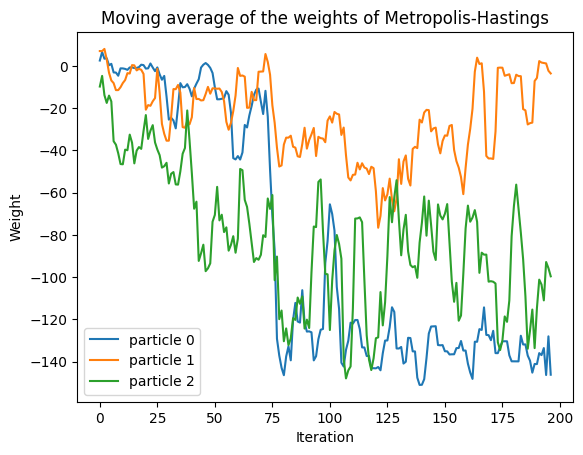

In [15]:
#Plot the moving average of the weights
window_size = 5
plt.figure()
for i_particle in range(nb_particles_mh):
    moving_avg = np.convolve([all_weights_mh[i_particle + i*nb_particles_mh] for i in range(len(all_weights_mh)//nb_particles_mh)], np.ones(window_size)/window_size, mode='valid')
    plt.plot(moving_avg, label="particle "+ str(i_particle))
plt.xlabel("Iteration")
plt.ylabel("Weight")
plt.legend()
plt.title("Moving average of the weights of Metropolis-Hastings")
plt.show()


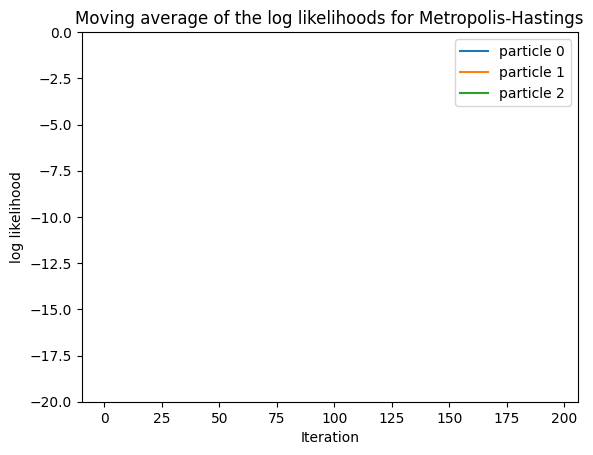

In [16]:
#Plot the likelihoods
window_size = 5
plt.figure()
for i_particle in range(nb_particles_mh):
    moving_avg = np.convolve([all_likelihoods_mh[i_particle + i*nb_particles_mh] for i in range(len(all_likelihoods_mh)//nb_particles_mh)], np.ones(window_size)/window_size, mode='valid')
    plt.plot(moving_avg, label="particle "+ str(i_particle))
plt.xlabel("Iteration")
plt.ylabel("log likelihood")
plt.legend()
plt.ylim(-20, 0)
plt.title("Moving average of the log likelihoods for Metropolis-Hastings")
plt.show()


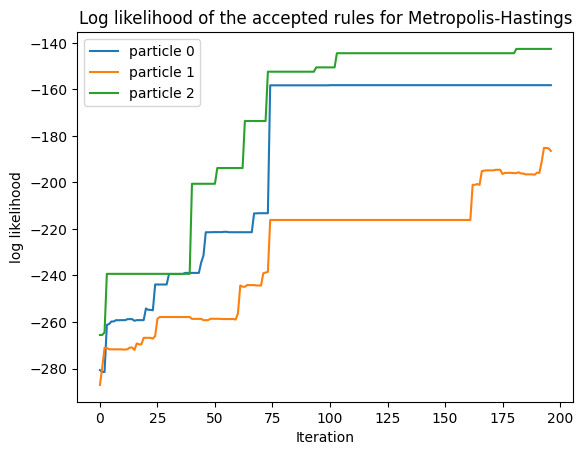

In [17]:
# Plot log likelihood only for rules accepted
plt.figure()
for i_particle in range(nb_particles_mh):
    indices = [i_particle + i*nb_particles_mh for i in range(len(all_prev_rules_ind_mh[nb_particles_mh:])//nb_particles_mh)]
    plt.plot(all_likelihoods_mh[indices][all_prev_rules_ind_mh[indices][nb_particles_mh:]], label="particle "+ str(i_particle))
plt.xlabel("Iteration")
plt.ylabel("log likelihood")
plt.legend()
plt.title("Log likelihood of the accepted rules for Metropolis-Hastings")
plt.show()

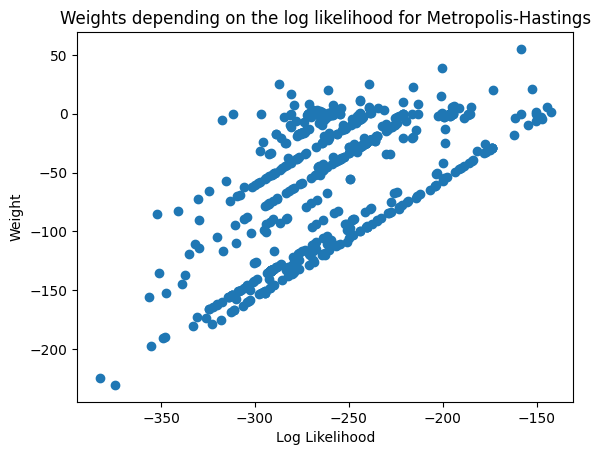

In [18]:
# Evolution of the weights depending on the likelihood
plt.figure()
plt.scatter(all_likelihoods_mh, all_weights_mh)
plt.xlabel("Log Likelihood")
plt.ylabel("Weight")
plt.title("Weights depending on the log likelihood for Metropolis-Hastings")
plt.show()


Text(0.5, 1.0, 'Weights depending on the log likelihood difference')

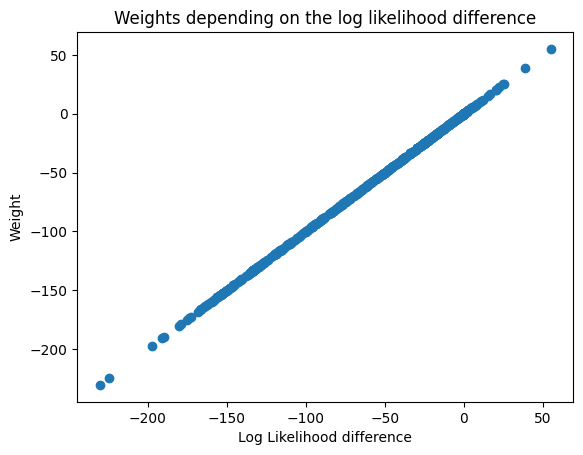

In [19]:
#Compute difference between rule and previous rule
# Find the position of the gloabl array given the branch and branch index

prev_indices = all_prev_rules_ind_mh[3:] * nb_particles_mh + np.tile(np.arange(nb_particles_mh),(len(all_weights_mh)//nb_particles_mh) -1)
all_likelihoods_mh[3:] - all_likelihoods_mh[prev_indices]
plt.figure()
plt.scatter(all_likelihoods_mh[3:]- all_likelihoods_mh[prev_indices], all_weights_mh[3:])
plt.xlabel("Log Likelihood difference")
plt.ylabel("Weight")
plt.title("Weights depending on the log likelihood difference")

# Embeddings

In [20]:
model = SentenceTransformer("all-mpnet-base-v2")
embeddings = model.encode(np.concatenate([all_rules_mh, all_rules_is], axis=0))
proj_embeddings = TSNE(n_components=2).fit_transform(embeddings)

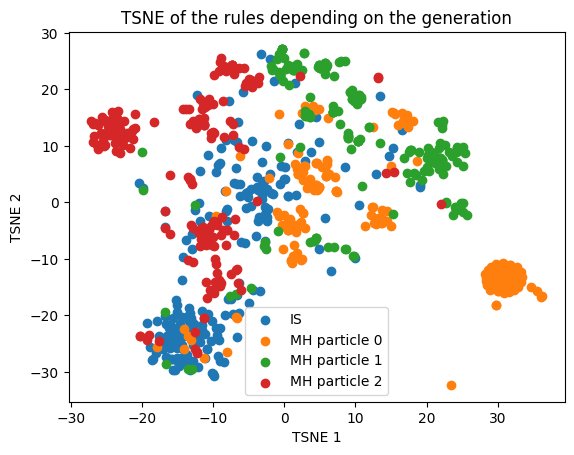

In [21]:
# Plot the embeddings
plt.figure()
plt.scatter(proj_embeddings[len(all_rules_mh):,0], proj_embeddings[len(all_rules_mh):,1], label="IS")
#Plot MH
indices = [np.arange(len(all_rules_mh), step=nb_particles_mh) + i for i in range(nb_particles_mh)]
for i, ind in enumerate(indices):
    plt.scatter(proj_embeddings[ind,0], proj_embeddings[ind,1], label="MH particle "+str(i))
plt.legend()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules depending on the generation")
plt.show()

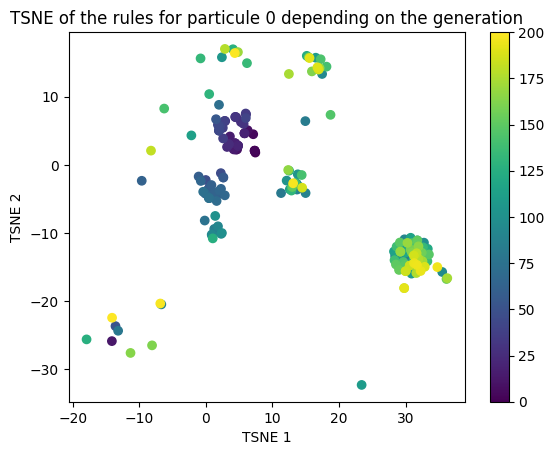

In [22]:
plt.figure()
plt.scatter(proj_embeddings[indices[0],0], proj_embeddings[indices[0],1], c=np.arange(len(indices[0])))
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules for particule 0 depending on the generation")
plt.show()

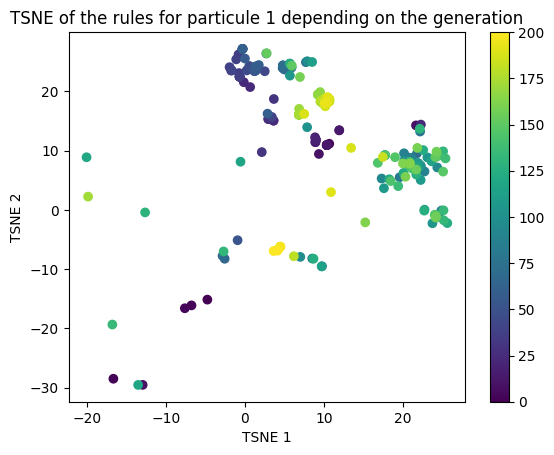

In [23]:
plt.figure()
plt.scatter(proj_embeddings[indices[1],0], proj_embeddings[indices[1],1], c=np.arange(len(indices[1])))
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules for particule 1 depending on the generation")
plt.show()

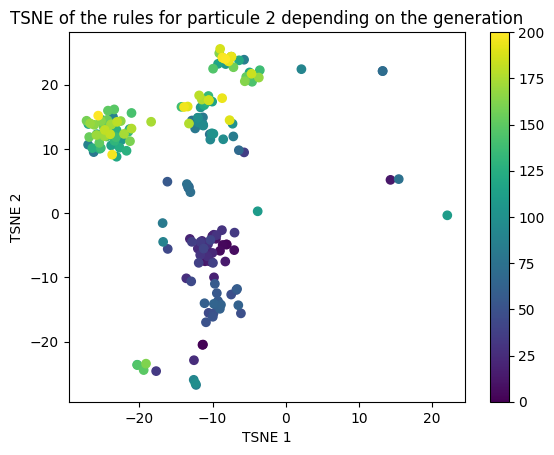

In [24]:
plt.figure()
plt.scatter(proj_embeddings[indices[2],0], proj_embeddings[indices[2],1], c=np.arange(len(indices[2])))
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules for particule 2 depending on the generation")
plt.show()

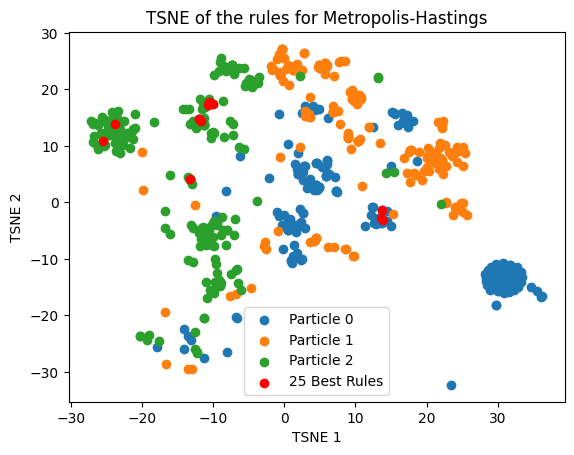

In [25]:
indices = [np.arange(len(all_rules_mh), step=nb_particles_mh) + i for i in range(nb_particles_mh)]
best_rules_ind = np.argsort(-np.array(all_likelihoods_mh))
# Plot the embeddings
plt.figure()
plt.scatter(proj_embeddings[indices[0],0], proj_embeddings[indices[0],1], label= "Particle 0")
plt.scatter(proj_embeddings[indices[1],0], proj_embeddings[indices[1],1], label= "Particle 1")
plt.scatter(proj_embeddings[indices[2],0], proj_embeddings[indices[2],1], label= "Particle 2")
plt.scatter(proj_embeddings[best_rules_ind[:15],0], proj_embeddings[best_rules_ind[:15],1], c="red", label= "25 Best Rules")
plt.legend()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules for Metropolis-Hastings")
plt.show()

#### Only for accepted rules

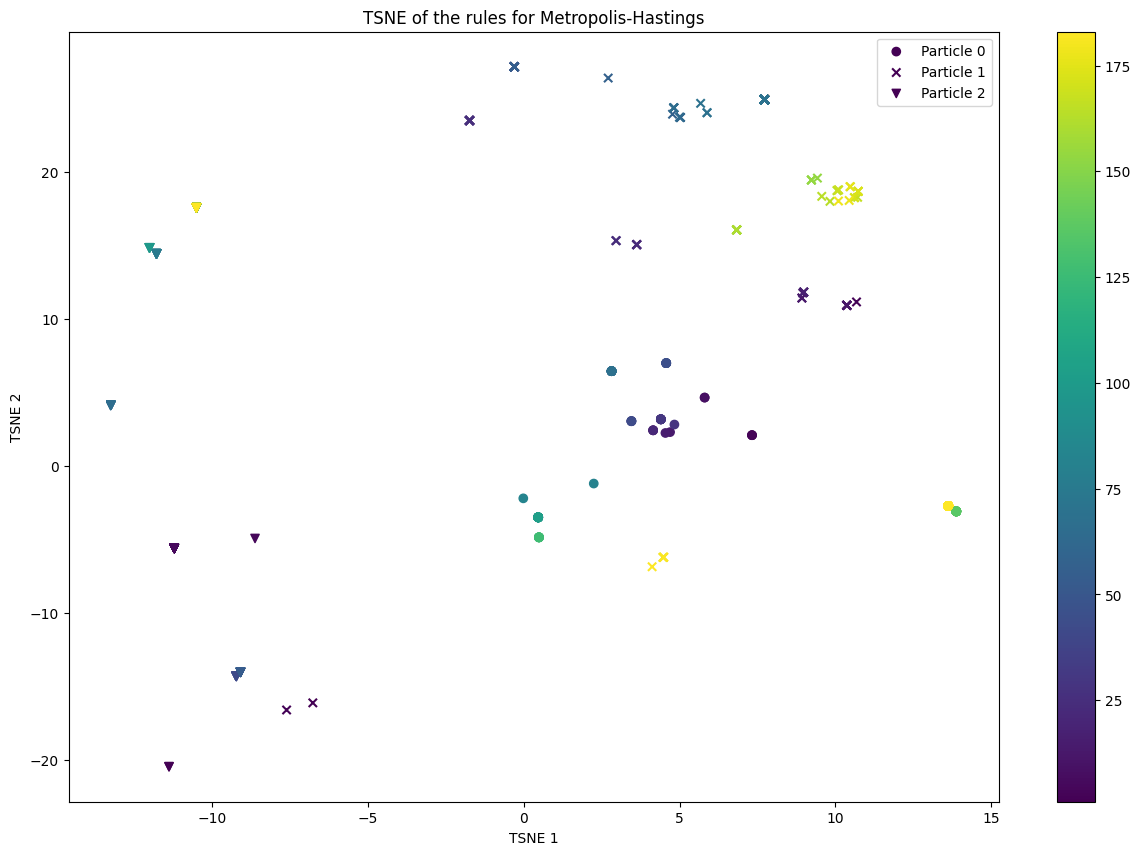

In [26]:
from matplotlib.colors import Normalize


indices = [np.arange(len(all_prev_rules_ind_mh[nb_particles_mh:]), step=nb_particles_mh) + i for i in range(nb_particles_mh)]
all_prev_rules_ind_mh = np.array(metrics_mh["prev_rules_ind"])
# Plot the embeddings
symbols = ["o", "x", "v", "^", "<", ">", "1", "2", "3", "4"]
plt.figure(figsize=(15,10))
for i in range(len(indices)):
    plt.scatter(proj_embeddings[indices[i],0][all_prev_rules_ind_mh[indices[i]][nb_particles_mh:]], proj_embeddings[indices[i],1][all_prev_rules_ind_mh[indices[i]][nb_particles_mh:]], label= f"Particle {i}", marker=symbols[i], c=all_prev_rules_ind_mh[indices[i]][nb_particles_mh:])
plt.legend()
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules for Metropolis-Hastings")
plt.show()

#### Plot of the evolution of the likelihoods

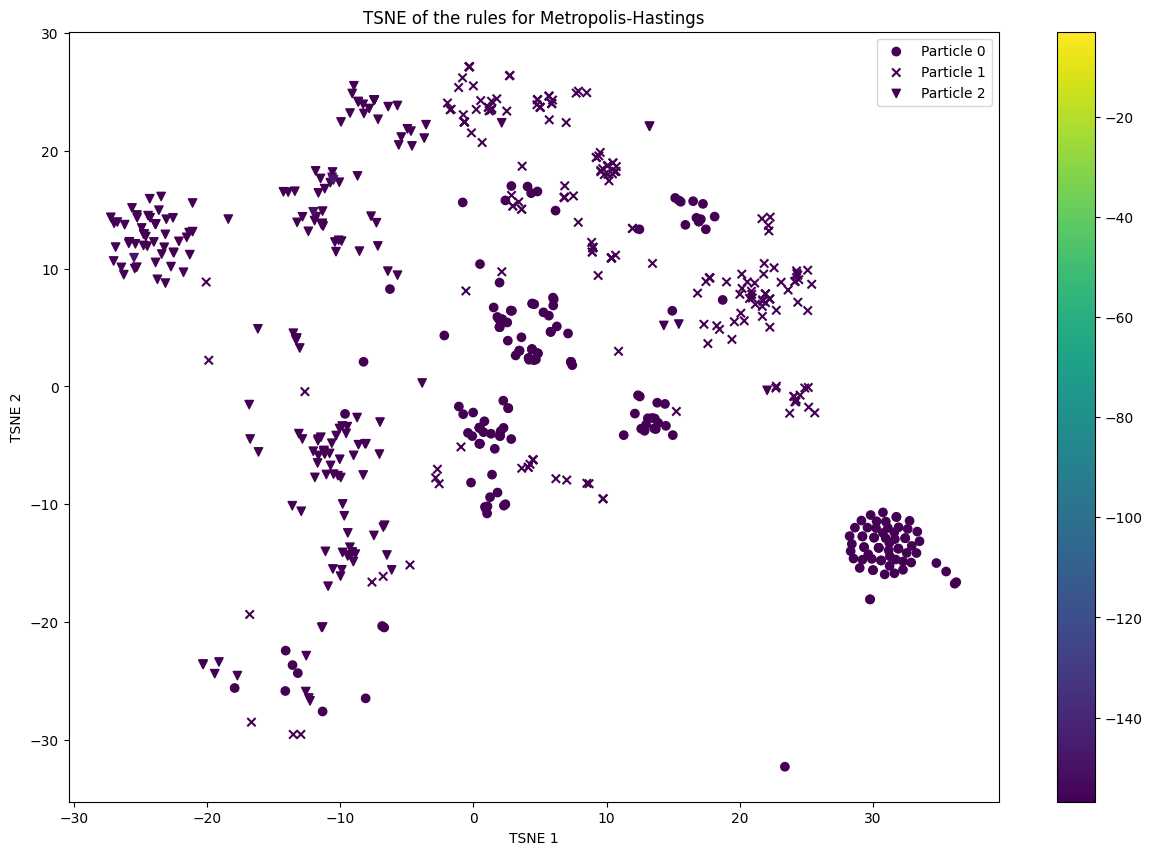

In [27]:
from matplotlib.colors import Normalize


indices = [np.arange(len(all_rules_mh), step=nb_particles_mh) + i for i in range(nb_particles_mh)]
best_rules_ind = np.argsort(-np.array(all_likelihoods_mh))
# Plot the embeddings
symbols = ["o", "x", "v", "^", "<", ">", "1", "2", "3", "4"]
min_likelihood, max_likelihood = np.min(all_likelihoods_mh), np.max(all_likelihoods_mh)
norm = Normalize(vmin=-3, vmax=max_likelihood)
plt.figure(figsize=(15,10))
for i in range(len(indices)):
    plt.scatter(proj_embeddings[indices[i],0], proj_embeddings[indices[i],1], label= f"Particle {i}", marker=symbols[i], c=all_likelihoods_mh[indices[i]], cmap="viridis", norm=norm)
plt.legend()
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules for Metropolis-Hastings")
plt.show()

### Look clusters rules

In [23]:
best_rules_ind[:15] % 3

array([1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2])

In [24]:
print(np.where((proj_embeddings[best_rules_ind[:15],0]) <0 & (proj_embeddings[best_rules_ind[:15],1] >0)))
all_rules_mh[best_rules_ind[np.where((proj_embeddings[best_rules_ind[:15],0]) <0 & (proj_embeddings[best_rules_ind[:15],1] >0))]]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 13, 14]),)


array(['The improved general rule can be: The door opens when you are holding a green key, regardless of its color, size, or type.',
       'The improved rule could be: "The door is opened when a green key, regardless of size, is held."',
       'The improved rule could be: "The door is opened when a green key, regardless of size, is held."',
       'The improved rule would be: "The door opens when you are holding a green key, regardless of its size."',
       'The improved rule could be: "The door is opened when a green key of any size is held."',
       'The improved rule, respecting all given trajectories, could be: "The door will open when you are holding a green key, regardless of its color or size."',
       "The rule should be 'The door opens when holding a medium or large green key, regardless of other colors or sizes.'",
       'The improved general rule is: "The door opens when you are holding a key that is green in color."',
       "The improved rule for the door is: 'The do

In [25]:
all_rules_mh[best_rules_ind[11:13]]

array(['"The door will open when you are holding a key with green color."',
       '"The door opens if you are holding a green key, regardless of color or size."'],
      dtype='<U498')

In [26]:
all_rules_mh[best_rules_ind[9]]

'The door will open if you are holding any green key, regardless of its color or size.'